## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
debug = 0     # Variable used in debugging
graphing = 0  # Variable use to graph data for testing and debugging

### Classification Report Plot Function

In [3]:
def plot_report(y_test, preds,targets = None):
    """ 
    Plot classification report 

    Parameters
    ----------
    y_test : pandas.Series
        the true values that we will predict
    preds : numpy.ndarray
        the predicted values
    target_names : list
        A list that contains the target classes names

    Return
    ------ 
    Classification report plot 
    """
    clf_report = classification_report(y_test,
                                       preds,
                                       target_names=targets,
                                       output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Loading Data

In [4]:
data = pd.read_csv('data.csv', index_col=False)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
data.shape

(863, 14)

In [6]:
if(debug==1):
    data.info()

In [7]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [8]:
# Count positive and negative results
# 1 Death
# 0 Recovered

data.result.value_counts()

0    755
1    108
Name: result, dtype: int64

In [9]:
# Count plot Death and Recovery
if(graphing == 1):
    sns.countplot(x="result", data=data, palette="bwr")
    plt.show()

In [10]:
# Plotting Age with Death and Recovery and time before symptoms appear
if(graphing == 1):
    plt.figure(figsize=(14,7))
    ax = sns.countplot(x=data.age[data.result==1], data=data)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    plt.tight_layout()
    plt.show()

# Visualizing all parts of the Data to get rid of unneccessary columns

In [11]:
if(graphing == 1):

    # Location
    plt.hist(data["location"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["location"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Location",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Country
    plt.hist(data["country"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["country"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Country",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Age
    plt.hist(data["age"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["age"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Age",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Visited Wuhan
    plt.hist(data["vis_wuhan"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["vis_wuhan"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Visited Wuhan",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # From Wuhan
    plt.hist(data["from_wuhan"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["from_wuhan"][data["result"]==1],color="black",alpha=0.5)
    plt.title("From Wuhan",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 1
    plt.hist(data["symptom1"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom1"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 1",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 2
    plt.hist(data["symptom2"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom2"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 2",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 3
    plt.hist(data["symptom3"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom3"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 3",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 4
    plt.hist(data["symptom4"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom4"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 4",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 5
    plt.hist(data["symptom5"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom5"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 5",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Symptom 6
    plt.hist(data["symptom6"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["symptom6"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Symptom 6",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()

    # Time before symptoms appear
    plt.hist(data["diff_sym_hos"][data["result"]==0],color="red",alpha=0.5)
    plt.hist(data["diff_sym_hos"][data["result"]==1],color="black",alpha=0.5)
    plt.title("Time before Symptoms appear",fontsize=12,color="black")
    plt.ylabel("FREQUENCY",fontsize=10,color="black")
    plt.legend(["Recovered","Death"])
    plt.style.use("fivethirtyeight")
    plt.gcf().set_size_inches(12,6)
    plt.show()


In [12]:
data.corr()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
location,1.000000,0.309347,0.030077,-0.027330,0.022821,0.080120,0.033078,0.017961,0.010472,-0.026823,0.033692,0.015341,-0.119397,0.046240
country,0.309347,1.000000,0.193208,0.072339,-0.149798,-0.194170,-0.078971,-0.085210,-0.042933,-0.018526,-0.009371,-0.004384,-0.146037,-0.094443
gender,0.030077,0.193208,1.000000,-0.020662,-0.005588,-0.138997,0.146706,0.116159,0.090858,0.021882,0.026320,0.039867,-0.176528,-0.061441
age,-0.027330,0.072339,-0.020662,1.000000,-0.157173,-0.051229,-0.209028,-0.127251,-0.074863,-0.069396,0.049817,0.055145,0.074573,0.515127
vis_wuhan,0.022821,-0.149798,-0.005588,-0.157173,1.000000,-0.154200,0.087330,0.094360,0.086113,0.063738,0.025780,0.016062,0.065908,-0.151122
from_wuhan,0.080120,-0.194170,-0.138997,-0.051229,-0.154200,1.000000,0.036539,0.046923,0.068144,0.021704,0.018999,0.011837,0.019706,0.128314
symptom1,0.033078,-0.078971,0.146706,-0.209028,0.087330,0.036539,1.000000,0.519404,0.260397,0.095402,-0.002658,0.086430,-0.141160,-0.163039
symptom2,0.017961,-0.085210,0.116159,-0.127251,0.094360,0.046923,0.519404,1.000000,0.530968,0.329583,0.159823,0.072975,-0.119052,-0.103270
symptom3,0.010472,-0.042933,0.090858,-0.074863,0.086113,0.068144,0.260397,0.530968,1.000000,0.429853,0.120301,0.146347,-0.124293,-0.074982
symptom4,-0.026823,-0.018526,0.021882,-0.069396,0.063738,0.021704,0.095402,0.329583,0.429853,1.000000,0.277558,0.110553,-0.089592,-0.108723


In [13]:
#we can better visualize the correlation in color with. The lighter the color, the greater the correlation value.

if(graphing == 1):
    plt.figure(figsize=(20, 17))
    matrix = np.triu(data.corr())
    sns.heatmap(data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

In [14]:
# plt.figure(figsize=(20,8))
# plt.title("Correlation Heatmap")
# sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt="f",cbar=True)

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop(['result'],axis =1)
y = data['result']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(abs(X),y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(20,'Score')) 

           Specs        Score
3            age  1052.849185
12  diff_sym_hos   223.527802
0       location    36.951263
6       symptom1    30.169106
1        country    27.593793
7       symptom2    18.334923
4      vis_wuhan    16.123593
5     from_wuhan    12.677731
8       symptom3     2.172480
2         gender     2.019685
9       symptom4     1.205944
10      symptom5     0.001994
11      symptom6     0.000166


# Comment:


## From the above table, we choosed to drop the last 5 insignificant features from the data
- gender
- symptom3
- symptom4
- symptom5
- symptom6

In [16]:
new_data = data

# Dropping unnecessary columns
new_data = new_data.drop(["gender", "symptom3", "symptom4", "symptom5", "symptom6"], axis=1)

if(debug==1):
    print(new_data.shape)
new_data.head()

,location,country,age,vis_wuhan,from_wuhan,symptom1,symptom2,diff_sym_hos,result
0,104,8,66.0,1,0,14,31,8,1
1,101,8,56.0,0,1,14,31,0,0
2,137,8,46.0,0,1,14,31,13,0
3,116,8,60.0,1,0,14,31,0,0
4,116,8,58.0,0,0,14,31,0,0


# Scaling and Splitting

In [17]:
x = new_data.iloc[:,:-1].values
y = new_data.iloc[:,8].values

if(debug==1):
    print(x.shape)
    print(y.shape)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42, shuffle=True)

## Note:
Different Random states gives different scores and this will effects the final scores of different classifiers

Try changing the random state and see the last 2 cells and compare with previous outputs before changing the random state

In [19]:
if(debug==1):
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

In [20]:
# Normalizing data before using cross-validation using KNN Classifier
# KNN uses Euclidean distances so the data should be normalized

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

if(debug==1):
    print(X_train)

# K-Nearest Neighbors

### Building Classifier and choosing optimal K using Cross Validation

In [21]:
temp = 0
tempi = 0
df = pd.DataFrame(columns = ["k",'score'])
for i in range(1, 31, 2): 
    model=KNeighborsClassifier(n_neighbors=i)
    cv_r2_scores_rf = cross_val_score(model,data.drop('result', 1),data['result'], cv=8)
    mean = np.mean(cv_r2_scores_rf)
    df.loc[i] = i
    df.loc[i,'score'] = mean
    if  mean > temp:
        temp = mean
        tempi = i
        print ("score:",temp,", k =",tempi)
print ("biggest success:",temp,", k =",tempi)

score: 0.9142761336102457 , k = 1
score: 0.917759172724126 , k = 3
score: 0.9200739875389409 , k = 5
score: 0.9258502076843198 , k = 9
biggest success: 0.9258502076843198 , k = 9


In [22]:
# # Hyperparameters to be tuned
# knn = KNeighborsClassifier()

# #print(knn.get_params().keys())

# grid_params = { 'n_neighbors' : list(range(1,16)),
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}

# grid = GridSearchCV(knn, grid_params, cv=8, scoring='recall', n_jobs=-1,verbose=1)

# # Fit the grid
# grid.fit(X_train,y_train)

# print("Best cross-validation score: {:.2f}".format(grid.best_score_))
# print("Best parameters: \n{}".format(grid.best_params_))

# Printing out the different values of k used to train the model

In [23]:
if(graphing == 1):
    plt.figure(figsize=(16,8))
    sns.barplot(y=df.score,x=df.k)
    plt.title("k means score(Blue line shows the biggest score)")
    plt.axhline(0.9258502076843198,0,5)
    plt.axhline(1)

In [24]:
# param_grid = dict(n_neighbors=k_range)
# knn_cv= GridSearchCV(knn,param_grid,cv=8,scoring='roc_auc')
# knn_cv.fit(X_train, y_train)

# # This scoring is for ROC/AUC score to choose the best K
# # WE Will see about which score to use

# print("Best Score: " + str(knn_cv.best_score_))
# print("Best Parameters: " + str(knn_cv.best_params_))

### Using the best parameters to train the model

In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# using the model in prediction
y_pred = knn.predict(X_test)

In [26]:
# KNN Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

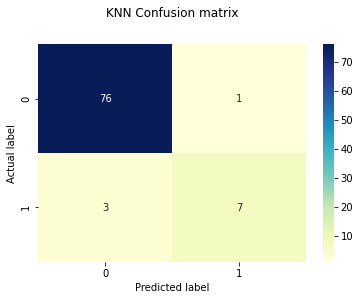

In [27]:
p = sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
#Classification report

#print(classification_report(y_test,y_pred))

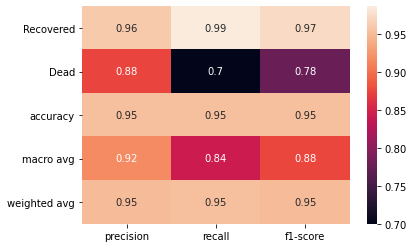

In [29]:
plot_report(y_test,y_pred,['Recovered','Dead'])

## Creating some lists to save different scores of different classifiers to compare between them

In [30]:
#we created a table for the training data scored
accuracy_table = []
precision_table = []
recall_table = []
f1_table = []
roc_auc_table = []

#another table for the test data scores
accuracy_table_test = []
precision_table_test = []
recall_table_test = []
f1_table_test = []
roc_auc_table_test = []


In [31]:
# Adding the scores of the KNN Classifier of train dataset

accuracy_table.append(cross_val_score(knn, X_train, y_train, cv = 8, scoring="accuracy").mean())
precision_table.append(cross_val_score(knn, X_train, y_train, cv = 8, scoring="precision").mean())
recall_table.append(cross_val_score(knn, X_train, y_train, cv = 8, scoring="recall").mean())
f1_table.append(cross_val_score(knn, X_train, y_train, cv = 8, scoring="f1").mean())
roc_auc_table.append(cross_val_score(knn, X_train, y_train, cv = 8, scoring="roc_auc").mean())

# Adding the scores of the KNN Classifier of test dataset

accuracy_table_test.append(metrics.accuracy_score(y_test, y_pred))
precision_table_test.append(metrics.precision_score(y_test, y_pred))
recall_table_test.append(metrics.recall_score(y_test, y_pred))
f1_table_test.append(metrics.f1_score(y_test, y_pred))
roc_auc_table_test.append(metrics.roc_auc_score(y_test, y_pred))

In [32]:
#To draw ROC curve for KNN

from sklearn.metrics import roc_curve, auc
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

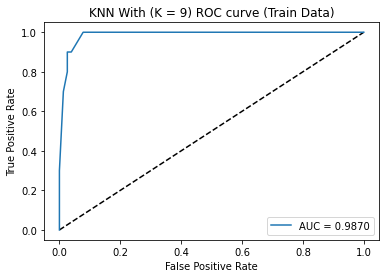

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('KNN With (K = 9) ROC curve (Train Data)')
plt.legend(loc = 'lower right')
plt.show()

## Comment:

The ROC/AUC Curve isn't completely smooth since the number of test samples are very small, but if we used the training data which contains more samples it gets smoother (see the below cells)

In [34]:
#To draw ROC curve for KNN
y_pred_proba = knn.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

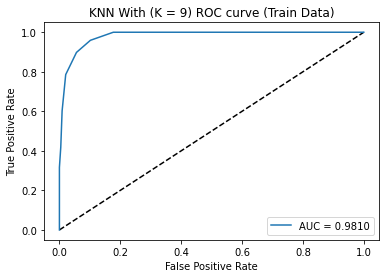

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('KNN With (K = 9) ROC curve (Train Data)')
plt.legend(loc = 'lower right')
plt.show()

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Hyperparameters to be tuned

Log_reg = LogisticRegression()

#LogisticRegression().get_params().keys()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2'],
              'C': [100, 10, 1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(Log_reg, param_grid, cv = 8, scoring='recall', n_jobs = -1, verbose = 1)
grid.fit(X_train, y_train)

# This scoring is for ROC/AUC score to choose the best K
# WE Will see about which score to use

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best Score: 0.7019230769230769
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [38]:
# Use the best hyperparameters
Logistic_clf = LogisticRegression(solver = 'liblinear', C=100 ,penalty = 'l1')
Logistic_clf.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [39]:
y_pred = Logistic_clf.predict(X_test)

In [40]:
# Logistic Regression Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

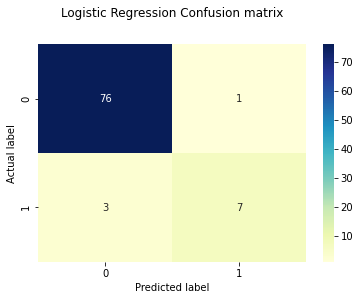

In [41]:
p = sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

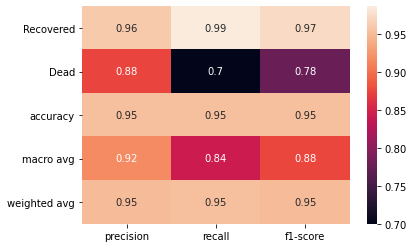

In [42]:
#Classification report

#print(classification_report(y_test,y_pred))
plot_report(y_test,y_pred,['Recovered','Dead'])

In [43]:
# Adding the scores of the Logistic Regression Classifier of train dataset

accuracy_table.append(cross_val_score(Logistic_clf, X_train, y_train, scoring="accuracy").mean())
precision_table.append(cross_val_score(Logistic_clf, X_train, y_train, scoring="precision").mean())
recall_table.append(cross_val_score(Logistic_clf, X_train, y_train, scoring="recall").mean())
f1_table.append(cross_val_score(Logistic_clf, X_train, y_train, scoring="f1").mean())
roc_auc_table.append(cross_val_score(Logistic_clf, X_train, y_train, scoring="roc_auc").mean())

# Adding the scores of the Logistic Regression Classifier of test dataset

accuracy_table_test.append(metrics.accuracy_score(y_test, y_pred))
precision_table_test.append(metrics.precision_score(y_test, y_pred))
recall_table_test.append(metrics.recall_score(y_test, y_pred))
f1_table_test.append(metrics.f1_score(y_test, y_pred))
roc_auc_table_test.append(metrics.roc_auc_score(y_test, y_pred))

In [44]:
#To draw ROC curve for Logistic Regression

y_pred_proba = Logistic_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

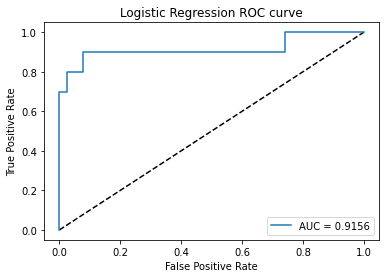

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [46]:
# y_pred_proba = Logistic_clf.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# #create ROC curve
# plt.plot(fpr,tpr)
# plt.title('Logistic Regression ROC curve')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
 
#Calling the Classr
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)
 
#Predict on test data
y_pred = naive_bayes.predict(X_test)

In [48]:
# Adding the scores of the Naive bayes Classifier of train dataset

accuracy_table.append(cross_val_score(naive_bayes, X_train, y_train, cv = 8, scoring="accuracy").mean())
precision_table.append(cross_val_score(naive_bayes, X_train, y_train, cv = 8, scoring="precision").mean())
recall_table.append(cross_val_score(naive_bayes, X_train, y_train, cv = 8, scoring="recall").mean())
f1_table.append(cross_val_score(naive_bayes, X_train, y_train, cv = 8, scoring="f1").mean())
roc_auc_table.append(cross_val_score(naive_bayes, X_train, y_train, cv = 8, scoring="roc_auc").mean())

# Adding the scores of the Naive bayes Classifier of test dataset

accuracy_table_test.append(metrics.accuracy_score(y_test, y_pred))
precision_table_test.append(metrics.precision_score(y_test, y_pred))
recall_table_test.append(metrics.recall_score(y_test, y_pred))
f1_table_test.append(metrics.f1_score(y_test, y_pred))
roc_auc_table_test.append(metrics.roc_auc_score(y_test, y_pred))

In [49]:
#To draw ROC curve for Naive bayes

y_pred_proba = naive_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [50]:
# Naive bayes Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

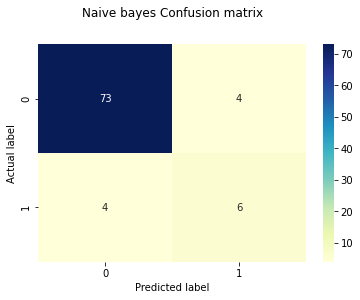

In [51]:
p = sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Naive bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

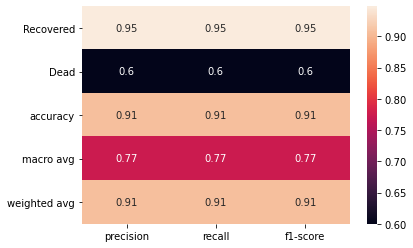

In [52]:
#Classification report

#print(classification_report(y_test,y_pred))

plot_report(y_test,y_pred,['Recovered','Dead'])

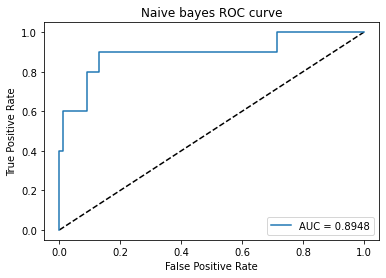

In [53]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Naive bayes ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Phase 2

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DT = DecisionTreeClassifier()

param_grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2, 10),
        }

grid = GridSearchCV(DT, param_grid, n_jobs=-1, cv=8, verbose=1, scoring='recall')
grid.fit(X_train, y_train)

# This scoring is for Recall score
# WE Will see about which score to use

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 8 folds for each of 144 candidates, totalling 1152 fits
Best Score: 0.8878205128205128
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6}


In [56]:
# Use the best hyperparameters
DT_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 6)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [57]:
y_pred = DT_clf.predict(X_test)

In [58]:
# Decision Tree Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

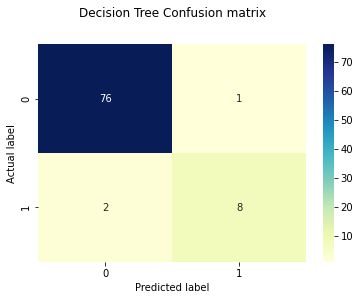

In [59]:
p = sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

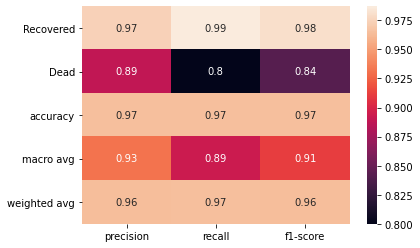

In [60]:
#Classification report

#print(classification_report(y_test,y_pred))
plot_report(y_test,y_pred,['Recovered','Dead'])

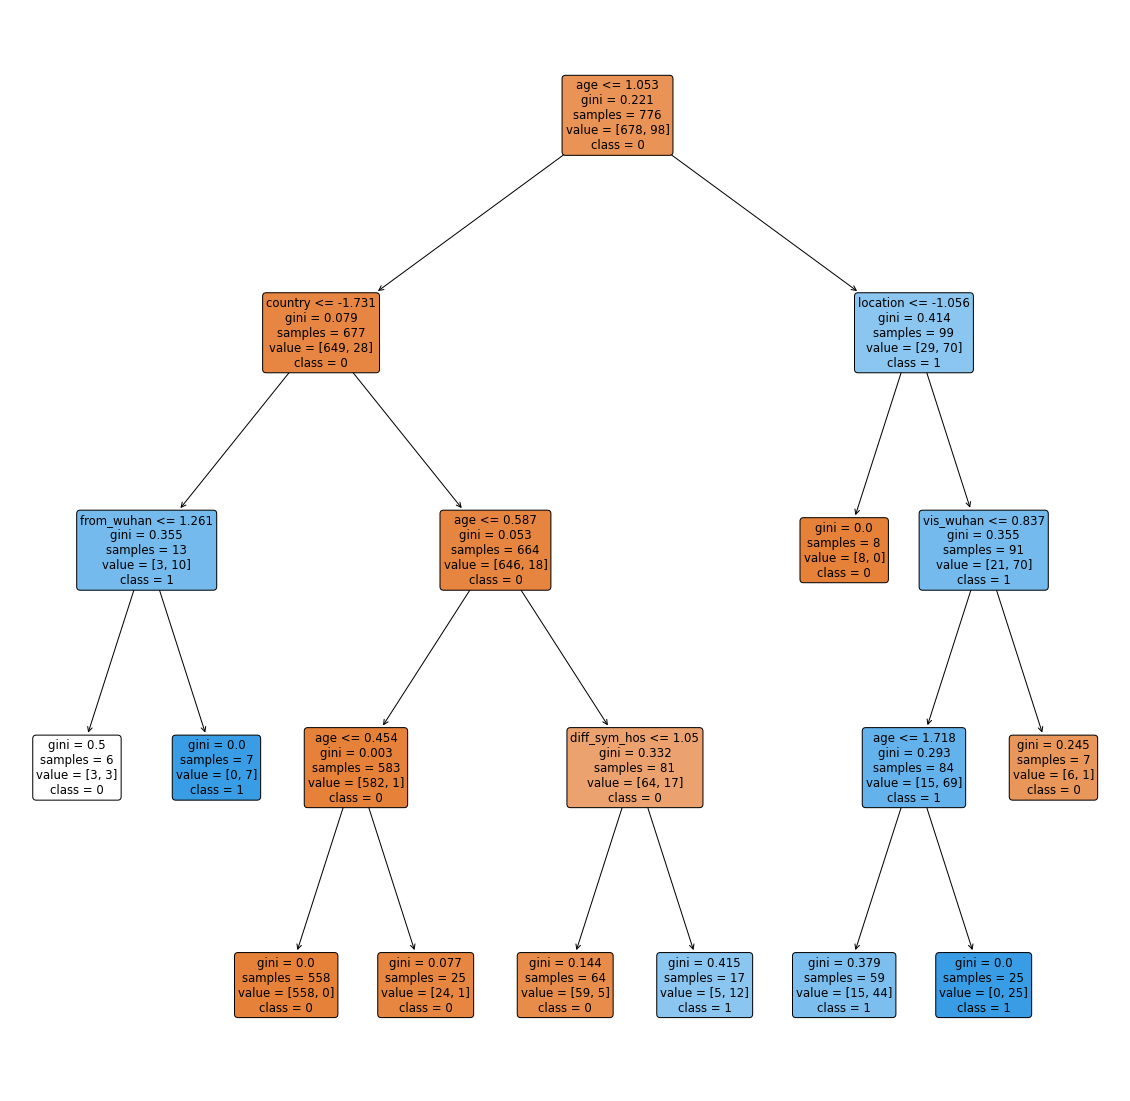

In [61]:
from sklearn import tree

feature_cols = ["location", "country", "age", "vis_wuhan", "from_wuhan", "symptom1", "symptom2", "diff_sym_hos"]

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(DT_clf, 
                   feature_names=feature_cols,  
                   class_names=['0', '1'], rounded = True,
                   filled=True)

In [62]:
# Adding the scores of the Decision Tree Classifier of train dataset

accuracy_table.append(cross_val_score(DT_clf, X_train, y_train, scoring="accuracy").mean())
precision_table.append(cross_val_score(DT_clf, X_train, y_train, scoring="precision").mean())
recall_table.append(cross_val_score(DT_clf, X_train, y_train, scoring="recall").mean())
f1_table.append(cross_val_score(DT_clf, X_train, y_train, scoring="f1").mean())
roc_auc_table.append(cross_val_score(DT_clf, X_train, y_train, scoring="roc_auc").mean())

# Adding the scores of the Decision Tree Classifier of test dataset

accuracy_table_test.append(metrics.accuracy_score(y_test, y_pred))
precision_table_test.append(metrics.precision_score(y_test, y_pred))
recall_table_test.append(metrics.recall_score(y_test, y_pred))
f1_table_test.append(metrics.f1_score(y_test, y_pred))
roc_auc_table_test.append(metrics.roc_auc_score(y_test, y_pred))

In [63]:
#To draw ROC curve for Decision Tree

y_pred_proba = DT_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

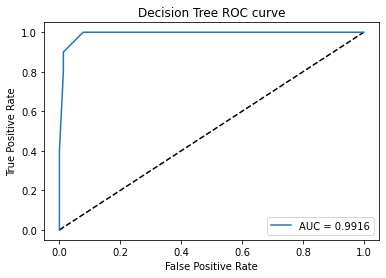

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Support Vector Machine (SVM) Classifier:

In [65]:
from sklearn.svm import SVC

In [66]:
SVM = SVC()
SVM.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [67]:
SVM = SVC()

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'C': [1, 10, 100, 1000, 10000],
        'degree': range(1,6)
        }

grid = GridSearchCV(SVM, param_grid, n_jobs=-1, cv=8, verbose=1, scoring='recall')
grid.fit(X_train, y_train)

# This scoring is for Recall score
# WE Will see about which score to use

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 8 folds for each of 200 candidates, totalling 1600 fits
Best Score: 0.7828525641025641
Best Parameters: {'C': 1000, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [68]:
# Use the best hyperparameters
SVM_clf = SVC(C = 1000, degree = 1, gamma = 'scale', kernel = 'rbf', probability = True)
SVM_clf.fit(X_train, y_train)

SVC(C=1000, degree=1, probability=True)

In [69]:
y_pred = SVM_clf.predict(X_test)

In [70]:
# SVM Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

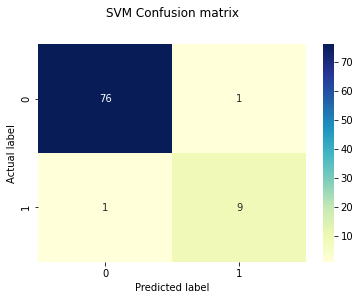

In [71]:
p = sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('SVM Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

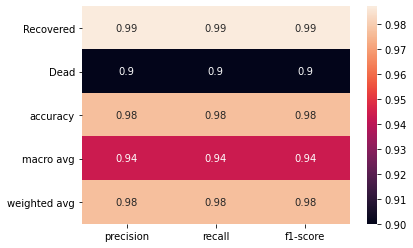

In [72]:
#Classification report

#print(classification_report(y_test,y_pred))
plot_report(y_test,y_pred,['Recovered','Dead'])

In [73]:
# Adding the scores of the Decision SVM Classifier of train dataset

accuracy_table.append(cross_val_score(SVM_clf, X_train, y_train, scoring="accuracy").mean())
precision_table.append(cross_val_score(SVM_clf, X_train, y_train, scoring="precision").mean())
recall_table.append(cross_val_score(SVM_clf, X_train, y_train, scoring="recall").mean())
f1_table.append(cross_val_score(SVM_clf, X_train, y_train, scoring="f1").mean())
roc_auc_table.append(cross_val_score(SVM_clf, X_train, y_train, scoring="roc_auc").mean())

# Adding the scores of the SVM Classifier of test dataset

accuracy_table_test.append(metrics.accuracy_score(y_test, y_pred))
precision_table_test.append(metrics.precision_score(y_test, y_pred))
recall_table_test.append(metrics.recall_score(y_test, y_pred))
f1_table_test.append(metrics.f1_score(y_test, y_pred))
roc_auc_table_test.append(metrics.roc_auc_score(y_test, y_pred))

In [74]:
#To draw ROC curve for SVM

y_pred_proba = SVM_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

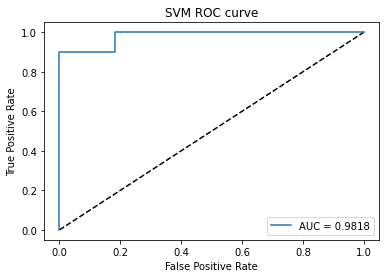

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'AUC = %0.4f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('SVM ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Comment for ROCs Curves:

The ROC/AUC Curve isn't completely smooth since the number of test samples are very small, but if we used the training data which contains more samples it gets smoother (see the below cells)

# Tabulating Different metrics

In [76]:
# Tabulating the different metrics

final_table = dict()
final_table["Classifier"] = ["KNN","Logistic Regression", "Naive bayes", "Decision Tree", "SVM"]
final_table["Accuracy"] = accuracy_table
final_table["Precision"] = precision_table
final_table["Recall"] = recall_table
final_table["f1 score"] = f1_table
final_table["ROC/AUC"] = roc_auc_table


df = pd.DataFrame(final_table)
df.head()

,Classifier,Accuracy,Precision,Recall,f1 score,ROC/AUC
0,KNN,0.918814,0.860268,0.436699,0.570856,0.953512
1,Logistic Regression,0.940728,0.798519,0.701579,0.740230,0.951165
2,Naive bayes,0.885309,0.545238,0.730769,0.618779,0.900158
3,Decision Tree,0.942018,0.742060,0.815263,0.775157,0.962149
4,SVM,0.939462,0.754161,0.776316,0.761236,0.965672


## Comment for Phase 1:
From the table we see that Logistic Regression has the highest f1 score, accuracy and a high ROC/AUC score.

## Comment for Phase 2:
we can see that the Decision Tree has higher metrics compared to the SVM on the training data.
but After comparing the metrics on the test data, we concluded that the Tree tend to overfit the data a little which explains why it performs better on the training data.

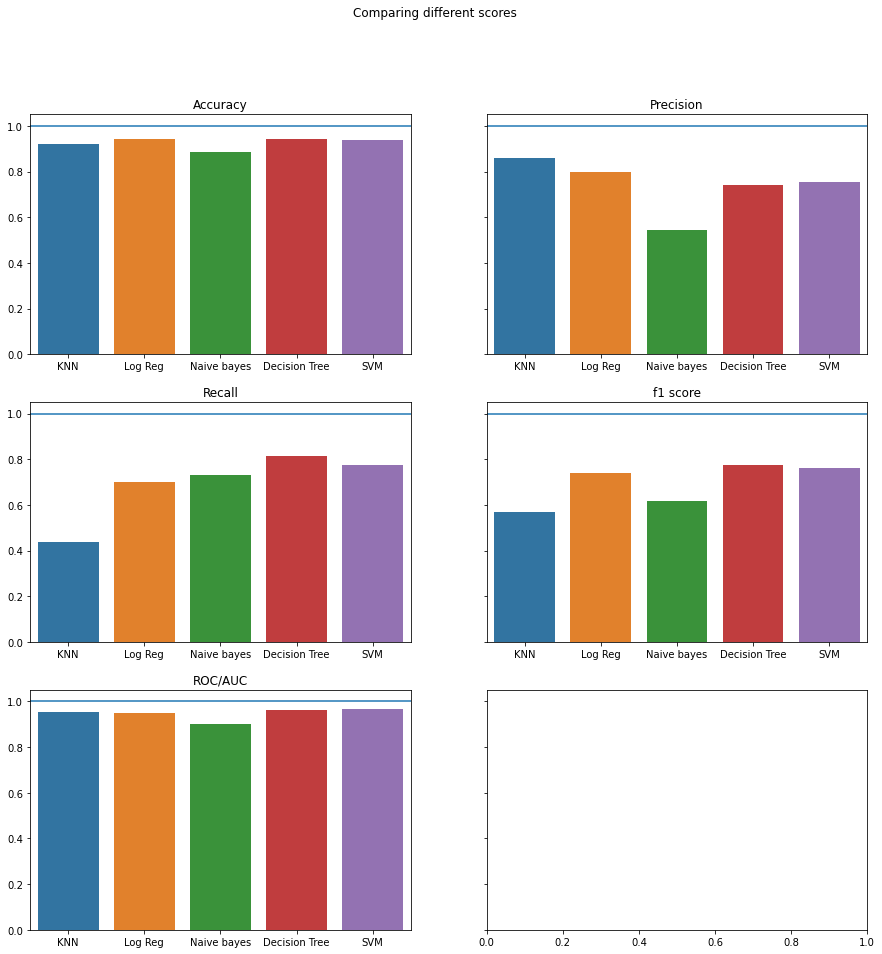

In [77]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Comparing different scores')

# Accuracy
sns.barplot(ax=axes[0][0], y=final_table["Accuracy"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[0][0].set_title("Accuracy")
#axes[0][0].axhline(0.940728,0,5)
axes[0][0].axhline(1)

# Precision
sns.barplot(ax=axes[0][1], y=final_table["Precision"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[0][1].set_title("Precision")
#axes[0][1].axhline(0.860268,0,5)
axes[0][1].axhline(1)

# Recall
sns.barplot(ax=axes[1][0], y=final_table["Recall"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[1][0].set_title("Recall")
#axes[1][0].axhline(0.730769,0,5)
axes[1][0].axhline(1)

# f1 score
sns.barplot(ax=axes[1][1], y=final_table["f1 score"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[1][1].set_title("f1 score")
#axes[1][1].axhline(0.740230,0,5)
axes[1][1].axhline(1)

# ROC/AUC
sns.barplot(ax=axes[2][0], y=final_table["ROC/AUC"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[2][0].set_title("ROC/AUC")
#axes[2][0].axhline(0.953512,0,5)
axes[2][0].axhline(1)

# And then we print the table for the metrices on the predicted data

In [78]:
# Tabulating the different metrics

final_table_test = dict()
final_table_test["Classifier"] = ["KNN","Logistic Regression", "Naive bayes", "Decision Tree", "SVM"]
final_table_test["Accuracy"] = accuracy_table_test
final_table_test["Precision"] = precision_table_test
final_table_test["Recall"] = recall_table_test
final_table_test["f1 score"] = f1_table_test
final_table_test["ROC/AUC"] = roc_auc_table_test


df = pd.DataFrame(final_table_test)
df.head()

,Classifier,Accuracy,Precision,Recall,f1 score,ROC/AUC
0,KNN,0.954023,0.875000,0.7,0.777778,0.843506
1,Logistic Regression,0.954023,0.875000,0.7,0.777778,0.843506
2,Naive bayes,0.908046,0.600000,0.6,0.600000,0.774026
3,Decision Tree,0.965517,0.888889,0.8,0.842105,0.893506
4,SVM,0.977011,0.900000,0.9,0.900000,0.943506


# Then we visualize the different scores on the different models.

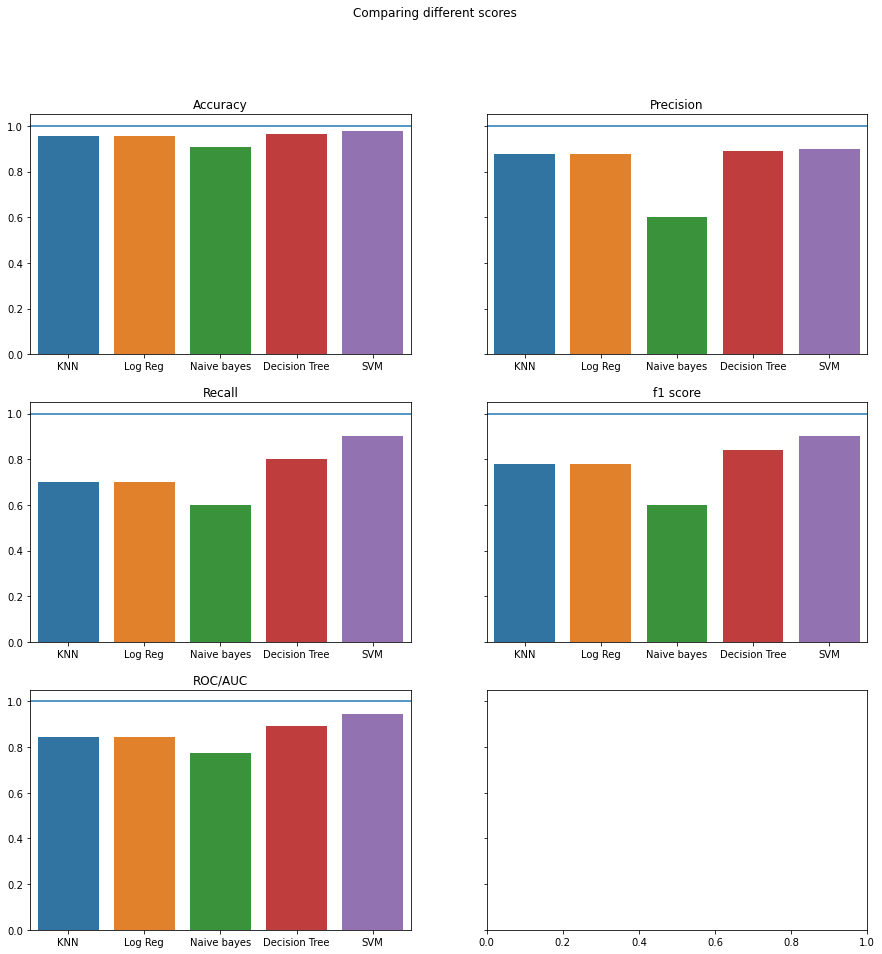

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Comparing different scores')

# Accuracy
sns.barplot(ax=axes[0][0], y=final_table_test["Accuracy"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[0][0].set_title("Accuracy")
#axes[0][0].axhline(0.954023,0,5)
axes[0][0].axhline(1)

# Precision
sns.barplot(ax=axes[0][1], y=final_table_test["Precision"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[0][1].set_title("Precision")
#axes[0][1].axhline(0.875,0,5)
axes[0][1].axhline(1)

# Recall
sns.barplot(ax=axes[1][0], y=final_table_test["Recall"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[1][0].set_title("Recall")
#axes[1][0].axhline(0.7,0,5)
axes[1][0].axhline(1)

# f1 score
sns.barplot(ax=axes[1][1], y=final_table_test["f1 score"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[1][1].set_title("f1 score")
#axes[1][1].axhline(0.777778,0,5)
axes[1][1].axhline(1)

# ROC/AUC
sns.barplot(ax=axes[2][0], y=final_table_test["ROC/AUC"],x=["KNN","Log Reg", "Naive bayes", "Decision Tree", "SVM"])
axes[2][0].set_title("ROC/AUC")
#axes[2][0].axhline(0.843506,0,5)
axes[2][0].axhline(1)

## Comment for Phase 1:
And from the plots we found that KNN and Logistic Regression got the same scores (It is a coincedence which can be changed by changing the random state when splitting the data and the differences also comes because the dataset is small) Their recall metrics is (0.7) and Naive Bayes got (0.6)

- From the above plots we find that in our case we could choose the KNN with K = 9 model or choose the Logistic Regression model

## Comment for Phase 2:
After using the SVM and the Decision Tree, we found that the SVM has the highest metrics compared to the other models

## Comparing Models:
- In comparison with Naive Bayes Algorithm, Support Vector Machine Algorithm has a faster prediction along with better accuracy.

- In comparison with Logistic Regression which is also a classification method SVM proves itself to be cheaper , it has a time complexity of O(N^2*K) where K is no of support vectors whereas logistic Regression had the time complexity of O(N^3).

## Comment for ROCs Curves:

The ROC/AUC Curve isn't completely smooth since the number of test samples are very small, but if we used the training data which contains more samples it gets smoother (see the below cells)